In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11114 entries, 0 to 11113
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11114 non-null  int64  
 1   name      11114 non-null  object 
 2   genre     11052 non-null  object 
 3   type      11091 non-null  object 
 4   episodes  11114 non-null  object 
 5   rating    10894 non-null  float64
 6   members   11114 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 607.9+ KB
None


In [4]:
print(df.describe())

           anime_id        rating       members
count  11114.000000  10894.000000  1.111400e+04
mean   14494.764081      6.504418  1.967915e+04
std    11551.556969      1.050491  5.740776e+04
min        1.000000      1.670000  5.000000e+00
25%     3516.250000      5.900000  1.880000e+02
50%    10800.500000      6.620000  1.430000e+03
75%    25608.500000      7.240000  1.161500e+04
max    34527.000000     10.000000  1.013917e+06


### Handling Missing Value

In [5]:
print(df.isnull().sum())

anime_id      0
name          0
genre        62
type         23
episodes      0
rating      220
members       0
dtype: int64


In [6]:
df.duplicated().sum()

np.int64(0)

### Handling Numeric Value

In [7]:
df_copy = df.copy()  # Corrected copy creation

# Filling missing ratings value with mean
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Filters rows where the 'rating' was NaN
updated_rows = df_copy[df_copy[['rating']].isna().any(axis=1)]

# Display the updated rows with their new values
print("\nRows where missing values were imputed:")
print(df.loc[updated_rows.index, ['anime_id', 'name', 'rating']].head())


Rows where missing values were imputed:
       anime_id                                               name    rating
8968      34502                                    Inazma Delivery  6.504418
9657      34309  Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...  6.504418
10896     34096                                     Gintama (2017)  6.504418
10897     34134                                    One Punch Man 2  6.504418
10898     30484                                      Steins;Gate 0  6.504418


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14380\2788112188.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


### Handling Categorical Value

In [10]:
updated_rows = df_copy[df_copy[['type', 'genre']].isna().any(axis=1)]

# Fill missing values with mode for 'type' and 'genre'
df[['type', 'genre']] = df[['type', 'genre']].apply(lambda x: x.fillna(x.mode()[0]))

# Display the updated rows with their new values
print("\nRows where missing values were imputed:")
print(df.loc[updated_rows.index, ['anime_id', 'name', 'type', 'genre']].head())


Rows where missing values were imputed:
      anime_id                                       name     type   genre
2844     33242  IS: Infinite Stratos 2 - Infinite Wedding  Special  Comedy
3541     33589                              ViVid Strike!       TV  Comedy
6040     29765                          Metropolis (2009)    Movie  Comedy
6646     32695                               Match Shoujo      ONA  Comedy
7018     33187                           Katsudou Shashin    Movie  Comedy


In [11]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

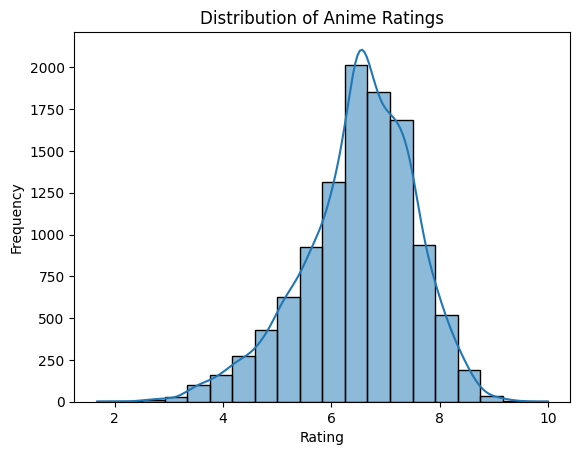

In [14]:
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

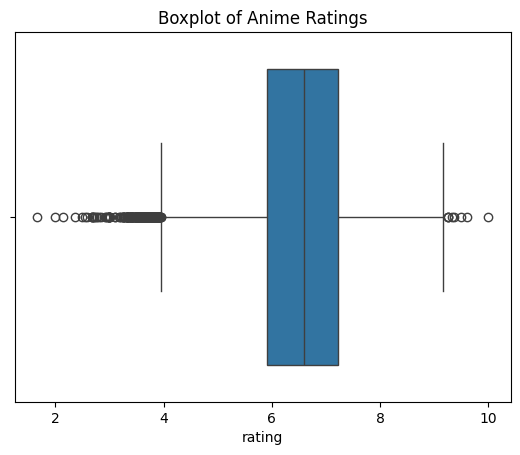

In [15]:
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Anime Ratings')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14380\2815078219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='rating', data=df, estimator=lambda x: x.mean(), palette='viridis')


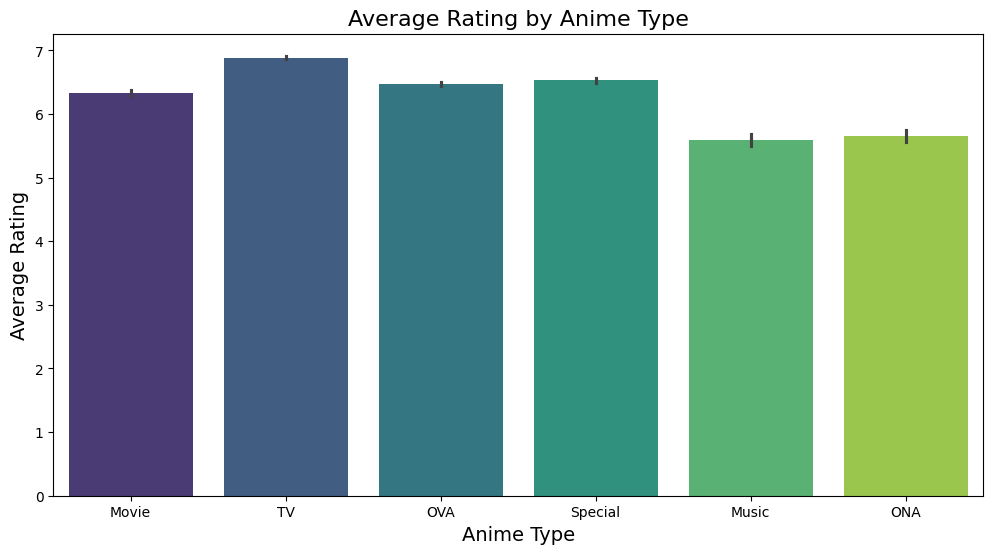

In [16]:
sample_data = df.sample(frac=0.5, random_state=42)
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='rating', data=df, estimator=lambda x: x.mean(), palette='viridis')

plt.title("Average Rating by Anime Type", fontsize=16)
plt.xlabel("Anime Type", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.show()

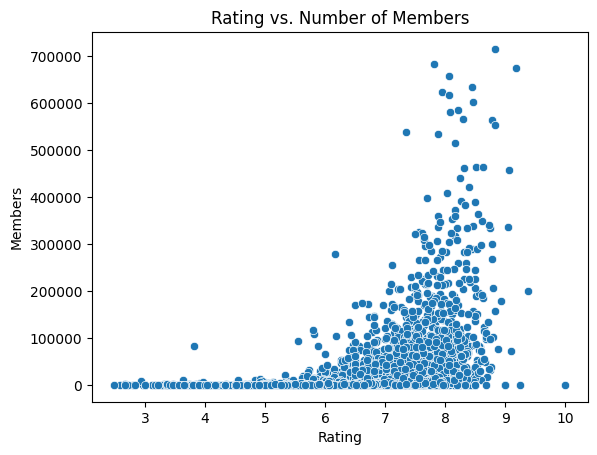

In [17]:
sns.scatterplot(x=sample_data['rating'], y=sample_data['members'])
plt.title('Rating vs. Number of Members')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14380\2934852638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette='gist_rainbow')


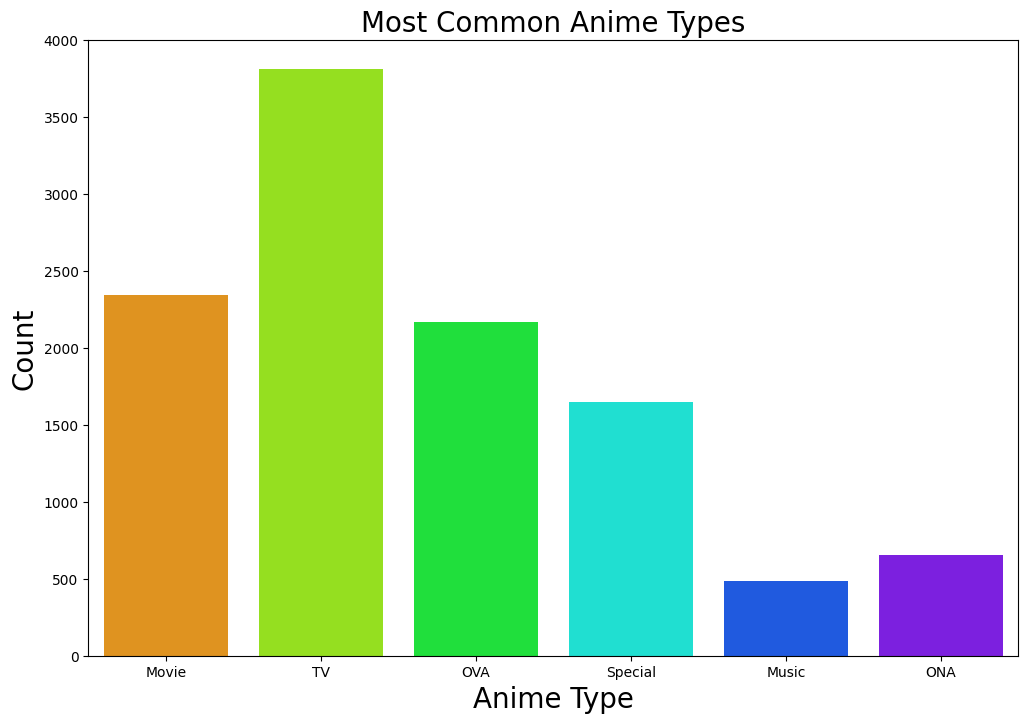

In [18]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=df['type'], palette='gist_rainbow')
plt.title("Most Common Anime Types", fontsize=20)
plt.xlabel("Anime Type", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Convert the 'rating', 'episodes', 'members' columns to numeric, coercing errors to NaN
df[['rating', 'episodes', 'members']] = df[['rating', 'episodes', 'members']].apply(pd.to_numeric, errors='coerce')

# Handle missing values (you can use fillna or dropna, depending on your preference)
df[['rating', 'episodes', 'members']] = df[['rating', 'episodes', 'members']].fillna(df[['rating', 'episodes', 'members']].mean())

# Now apply scalers
df_scalers = df[['rating', 'episodes', 'members']]

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_scalers), columns=df_scalers.columns)

# Log Transformation (Handling zero by adding 1) only on the numerical columns
df_log = df_scalers.copy()
df_log = np.log1p(df_log)

# Display results
print("\nStandard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Data:\n", df_log.head())


Standard Scaled Data:
      rating  episodes    members
0  2.755383 -0.257004   3.152170
1  2.649613  1.042572  13.482859
2  2.639998  0.774406   1.647636
3  2.563074  0.217445  11.390835
4  2.553459  0.774406   2.292247

MinMax Scaled Data:
      rating  episodes   members
0  0.924370  0.000000  0.197872
1  0.911164  0.034673  0.782770
2  0.909964  0.027518  0.112689
3  0.900360  0.012658  0.664325
4  0.899160  0.027518  0.149186

Robust Scaled Data:
      rating  episodes    members
0  2.122137 -0.083333  17.432397
1  2.038168  5.166667  69.330095
2  2.030534  4.083333   9.874158
3  1.969466  1.833333  58.820513
4  1.961832  4.083333  13.112453

MaxAbs Scaled Data:
    rating  episodes   members
0   0.937  0.000550  0.197876
1   0.926  0.035204  0.782771
2   0.925  0.028053  0.112694
3   0.917  0.013201  0.664327
4   0.916  0.028053  0.149190

Log Transformed Data:
      rating  episodes    members
0  2.338917  0.693147  12.209223
1  2.328253  4.174387  13.584418
2  2.327278  3.9512

### Handling Outliers

In [20]:
# Select numerical columns for outlier removal
df_outliers = df[['rating', 'episodes', 'members']]

# Calculate IQR
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that are outside the IQR bounds
df_no_outliers = df[~((df_outliers < lower_bound) | (df_outliers > upper_bound)).any(axis=1)]

# Display the first few rows after removing outliers
print(df_no_outliers.head())

     anime_id                                         name  \
41      32366                   Gintama°: Aizome Kaori-hen   
63      21899  Gintama: Yorinuki Gintama-san on Theater 2D   
73       5028                                     Major S5   
81      18617                    Girls und Panzer der Film   
103     11917                          Major: World Series   

                                                 genre   type  episodes  \
41                                      Comedy, Parody    OVA       2.0   
63   Action, Comedy, Historical, Parody, Samurai, S...  Movie       2.0   
73                      Comedy, Drama, Romance, Sports     TV      25.0   
81                                    Military, School  Movie       1.0   
103                              Comedy, Drama, Sports    OVA       2.0   

     rating  members  
41     8.69    16947  
63     8.60    11104  
73     8.58    28653  
81     8.55    25641  
103    8.50    13405  


### Feature Selection

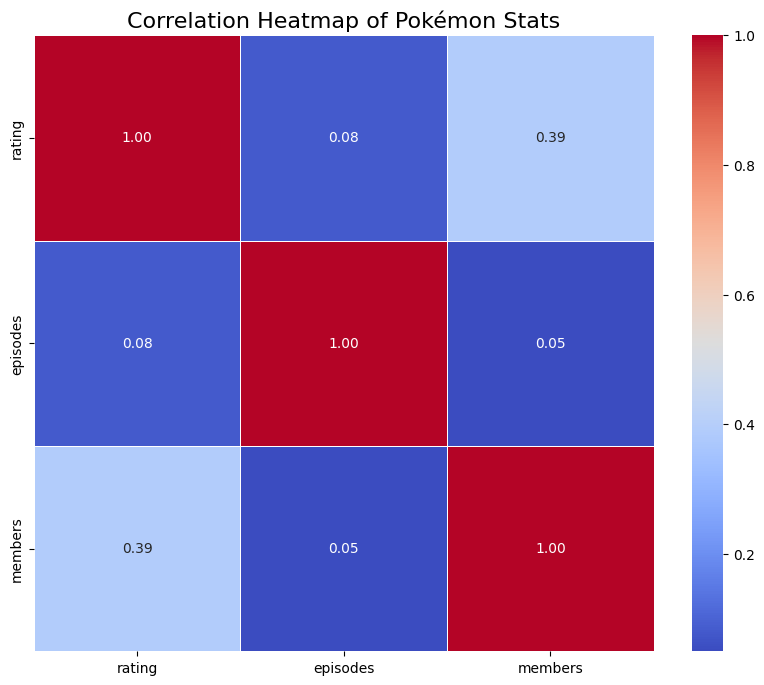

['rating', 'episodes', 'members']


In [21]:
corr_matrix = df[['rating', 'episodes', 'members']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pokémon Stats", fontsize=16)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

### Principle Component Analysis

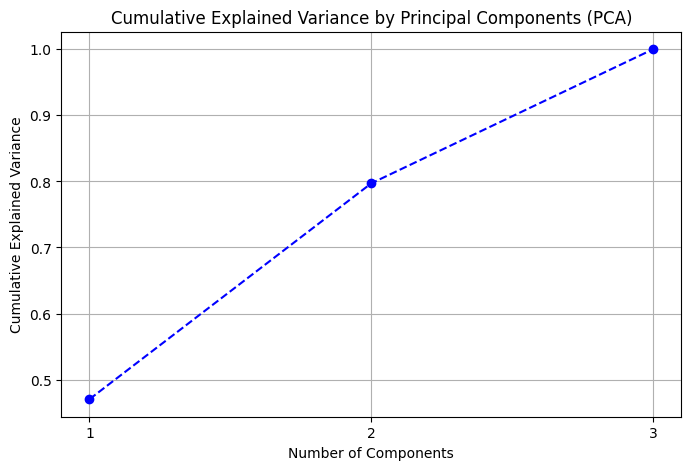

Explained Variance Ratio (each component): [0.47039381 0.32667157 0.20293461]


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_numeric = df[['rating', 'episodes', 'members']]

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply PCA - Use number of components equal to the number of features in your data
n_components = min(df_scaled.shape[1], 5)  # Ensures we don't ask for more components than available features
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')

plt.title("Cumulative Explained Variance by Principal Components (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(explained_variance) + 1))  # Ensure every component has a tick
plt.grid(True)
plt.show()

# Display the explained variance ratio for each component
print("Explained Variance Ratio (each component):", explained_variance)